In [50]:
import pickle
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scanpy as sc
import anndata as ad
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# Matplotlib colours module.
import matplotlib.colors as mpcol

# final regulons, final filtered UMAP from Stefan

In [97]:
#fname = 'D:Robin/Single_seq_data/final_nuclei/full.loom' #all cells
fname = 'D:Robin/Single_seq_data/final_nuclei/subcluster.loom' #only excitatory neurons

data = ad.read_loom(fname,sparse=False)
sc.pp.scale(data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [53]:
py_auc_fname = 'D:Robin/pyscenic/final_nuclei/full_auc_mtx.p'

py_auc = pickle.load(open(py_auc_fname,'rb'))

In [54]:
regulon_list = list(py_auc.columns)

In [55]:
for regulon in regulon_list:
    data.obs[regulon] = py_auc[regulon]

In [56]:
len(regulon_list)

125

# UMAP by colored by cluster labels for reference

... storing 'DF_Classification' as categorical
... storing 'all' as categorical
... storing 'cellIdent' as categorical
... storing 'clustIdent' as categorical
... storing 'hmIdent2' as categorical
... storing 'included' as categorical
... storing 'louvain' as categorical
... storing 'orig.ident' as categorical
... storing 'sampleID' as categorical
... storing 'sub_clusters_ExNeurons_names' as categorical
... storing 'sub_sub_clusters_ExNeurons_names' as categorical
... storing 'sub_subclustering' as categorical
... storing 'subclustering' as categorical


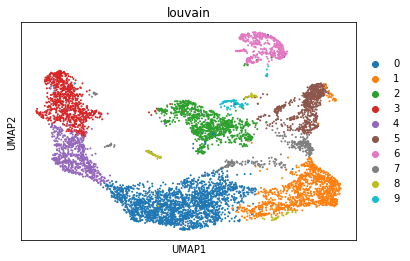

In [57]:
sc.pl.umap(data, color='louvain')

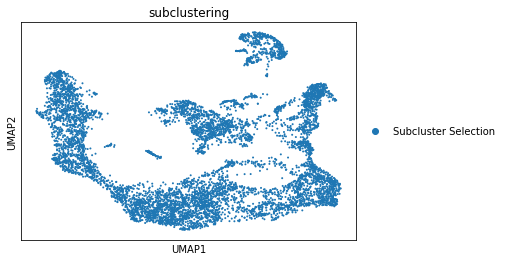

In [58]:
sc.pl.umap(data,color='subclustering')

# UMAP of each regulon

In [ ]:
sc.pl.umap(data, color=regulon_list)

In [16]:
#if you want to take a closer look at specific regulons
sc.pl.umap(data, color=['Alx3(+)', 'Arid5b(+)', 'Arnt(+)'])

# Look at which genes are in a given regulon

In [61]:
fname = 'D:Robin/pyscenic/final_nuclei/final_regulons.p'
fname = '../../pyscenic_data/final_nuclei/final_regulons.p'
regulons = pickle.load(open(fname,'rb'))

In [62]:
len(regulons)

121

In [92]:
#setting up a dictionary
regulon_dict = {}
for regulon in regulons:
    genes = [regulon.transcription_factor]
    genes.extend(regulon.genes)
    
    regulon_dict[regulon.name] = genes
    regulon_dict[regulon.transcription_factor] = genes

In [88]:
def print_genes(reg_list):
    for regulon in reg_list:
        print('genes in ',regulon,':')
        print(regulon_dict[regulon])
        print('\n')

In [ ]:
regulon_dict.keys()

## You can access the genes for a regulon with or without the (+) (the regulon name, transcption factor name, or a mix of both all work)

In [93]:
print_genes(['Arnt2'])

genes in  Arnt2 :
['Arnt2', 'Slc20a1', 'Mapre2', 'Mospd2', 'Fbxl3', 'Nbea', 'Klf15', 'Barhl2', 'Samd4', 'Kdm6a', 'Tom1', 'Lnx1', 'Adora1', 'Crebrf', 'Tbcel']




In [94]:
print_genes(['Arnt2(+)'])

genes in  Arnt2(+) :
['Arnt2', 'Slc20a1', 'Mapre2', 'Mospd2', 'Fbxl3', 'Nbea', 'Klf15', 'Barhl2', 'Samd4', 'Kdm6a', 'Tom1', 'Lnx1', 'Adora1', 'Crebrf', 'Tbcel']




In [95]:
print_genes(['Arnt2(+)','Foxo1'])

genes in  Arnt2(+) :
['Arnt2', 'Slc20a1', 'Mapre2', 'Mospd2', 'Fbxl3', 'Nbea', 'Klf15', 'Barhl2', 'Samd4', 'Kdm6a', 'Tom1', 'Lnx1', 'Adora1', 'Crebrf', 'Tbcel']


genes in  Foxo1 :
['Foxo1', 'Trpc7', 'Plppr1', 'Sorbs1', 'Kcnip4', 'Slc17a6', 'Eif1', 'Cdc14b', 'Deptor', 'Trpc6', 'Kcnh7', 'Nrn1', 'Gnb4', 'Nyap2', 'Sgk1', 'Foxo1', 'Hivep2', 'Kcnmb2', 'Bcl11b', 'Osbpl1a', 'Zbtb20', 'Galnt13', 'Tmem132d', 'Pitpnc1', 'Pip5k1b', 'Fryl', 'Skap1', 'AI593442', 'Cdk17', 'Adrb1', 'Zfp639', 'Trpc4', 'Ptma', 'Ddit4', 'Fbn1', 'Zbtb16', 'Tgfb3', 'Nfix', 'Neurod2', 'Hebp1', 'Enpp2', 'Fam43a', 'Ppargc1a', 'Zhx2', 'Cacng2', 'Scrt2', 'Pex5l', 'Pou3f3', 'Mllt3', 'Lmo4', 'Klf5', 'Spry4']




# Look at UMAP's for the individual genes within a regulon

In [22]:
#don't think I need this!!!

#If you would like to be able to look at the UMAP for individual genes, not just regulons
indiv_genes = pickle.load(open(PYSCENIC_GENE_MATRIX_FNAME,'rb'))

In [23]:
def indiv_umap(adata,regulon_name):
    for gene in regulon_dict[regulon_name]:
        adata.obs[gene] = indiv_genes[gene]
    sc.pl.umap(adata, color=regulon_dict[regulon_name])

In [71]:
def indiv_umap(adata,regulon_name):
    sc.pl.umap(adata, color=regulon_dict[regulon_name])

### Again, you can include the (+) or not. Unfortunately, this function does not take a list, so you'll have to look at each regulon individually.

In [ ]:
indiv_umap(data,'Foxo1')

... storing 'DF_Classification' as categorical
... storing 'all' as categorical
... storing 'cellIdent' as categorical
... storing 'clustIdent' as categorical
... storing 'hmIdent2' as categorical
... storing 'included' as categorical
... storing 'louvain' as categorical
... storing 'orig.ident' as categorical
... storing 'sampleID' as categorical
... storing 'sub_clusters_ExNeurons_names' as categorical
... storing 'sub_sub_clusters_ExNeurons_names' as categorical
... storing 'sub_subclustering' as categorical
... storing 'subclustering' as categorical


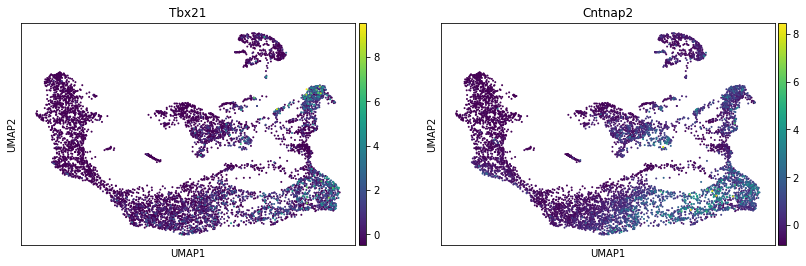

In [98]:
indiv_umap(data,'Tbx21(+)')